In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [300]:
# Import necessery Libraries:- 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


In [ ]:
# Load DataSet 
df_training = pd.read_csv('/kaggle/input/twitter-entity-sentiment-analysis/twitter_training.csv')
df_training.head()

In [ ]:
df_training.size,df_training.shape

In [ ]:
df_training.columns

In [ ]:
df_training.Borderlands.unique()


In [ ]:
df_training.Positive.unique()

In [ ]:
df_training['Positive']= pd.Categorical(df_training['Positive']).codes

In [ ]:
df_training.Positive.unique()

In [ ]:
df_training.isnull().sum()

In [ ]:
df_training.dropna(inplace=True)

In [ ]:
df_training.isnull().sum()

In [ ]:
# Rename the column 
df_training = df_training.rename(columns={'im getting on borderlands and i will murder you all ,': 'review'})

In [ ]:
df_training.head()
df_training.review[0]

In [ ]:
nltk.download('punkt') 
nltk.download('stopwords') 
stop_words = set(stopwords.words('english'))

In [ ]:
# stop_words

In [ ]:
df_training.info()

In [ ]:
# Function to handle lowercase conversion safely 
def to_lower(x): 
    if isinstance(x, str): 
        return x.lower() 
    return x

# Tokenize the text, remove stopwords, and perform other preprocessing steps:****# 

In [ ]:

def preprocess_text(text): 
    if not isinstance(text, str): 
        return ''
    text = to_lower(text)
    tokens = word_tokenize(text) 
    tokens = [word for word in tokens if word.isalpha()] # Remove punctuation 
    tokens = [word for word in tokens if word not in stop_words] # Remove stopwords 
    return ' '.join(tokens)

# # apply preprocess_text funciton on review column 


In [ ]:

df_training['clean_review'] = df_training['review'].apply(preprocess_text)

In [ ]:
df_training.head()

# Feature Extraction
# Convert the text data into numerical data using TF-IDF vectorization:

In [ ]:
df_training['Positive'].unique()

In [ ]:
df_training['Positive']= pd.Categorical(df_training['Positive']).codes

In [ ]:
df_training['Positive'].unique()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Vectorize the text data
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df_training['clean_review'])

# Convert labels to binary (1 for positive, 0 for negative)
y = df_training['Positive']
#.apply(lambda x: 1 if x == 'Positive' else 0)

# Split the data into training and testing sets, stratifying by label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [ ]:
y_train

In [ ]:
# from sklearn.utils import resample
# import pandas as pd

# # Combine X and y for resampling
# df_combined = pd.DataFrame.sparse.from_spmatrix(X)
# df_combined['label'] = y.values

# # Separate majority and minority classes
# df_majority = df_combined[df_combined['label'] == 0]
# df_minority = df_combined[df_combined['label'] == 1]

# # Upsample minority class
# df_minority_upsampled = resample(df_minority, 
#                                  replace=True,    # Sample with replacement
#                                  n_samples=len(df_majority), # Match number in majority class
#                                  random_state=42) # Reproducible results

# # Combine majority class with upsampled minority class
# df_combined_balanced = pd.concat([df_majority, df_minority_upsampled])

# # Separate X and y again
# X_balanced = df_combined_balanced.drop('label', axis=1)
# y_balanced = df_combined_balanced['label']

# # Split the balanced data into training and testing sets, stratifying by label
# X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(
#     X_balanced, y_balanced, test_size=0.2, stratify=y_balanced, random_state=42)

# # Train the model
# model = LogisticRegression()
# model.fit(X_train_balanced, y_train_balanced)


In [ ]:
# Check class distribution 
unique, counts = np.unique(y_train, return_counts=True) 
y_train = dict(zip(unique, counts)) 
# print(X_train)

In [ ]:
unique, counts = np.unique(y_test, return_counts=True) 
y_test = dict(zip(unique, counts)) 

In [ ]:
X_train

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

# Model Training
# Train a logistic regression model on the training data:

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

# Model Evaluation
# Evaluate the model on the test data and print performance metrics:

In [ ]:
y_pred = model.predict(X_test)

# Print accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Print classification report
print(classification_report(y_test, y_pred))

# Print confusion matrix
print(confusion_matrix(y_test, y_pred))


# Predict New Reviews
# Use the trained model to predict the sentiment of new reviews:

In [ ]:
df_training.Positive.unique()

In [ ]:
#new_reviews = ["I loved the movie!", "It was the worst film I've ever seen."]
new_reviews = ["I love this product", "This is terrible", "It's okay", "I have no opinion", "Best purchase ever", "Worst experience ever"]
new_reviews_clean = [preprocess_text(review) for review in new_reviews]
X_new = vectorizer.transform(new_reviews_clean)
predictions = model.predict(X_new)

for review, sentiment in zip(new_reviews, predictions):
    print(f"Review: {review} - Sentiment: {'Positive' if sentiment == 3 else ('Negative' if sentiment == 1 else 'Neutral' if sentiment == 2 else 'Irrelevant')}")

In [ ]:
df_validation = pd.read_csv('/kaggle/input/twitter-entity-sentiment-analysis/twitter_validation.csv')
df_validation.head()

In [ ]:
df_validation.columns

In [ ]:
df_validation = df_validation.rename(columns={'I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣': 'new_review'})

In [ ]:
df_validation.head()
df_validation.new_review[0]

In [ ]:
df_validation.size,df_validation.shape

In [ ]:
df_validation.Irrelevant.unique()

In [ ]:
df_validation.isnull().sum()

In [ ]:

df_validation['clean_review'] = df_validation['new_review'].apply(preprocess_text)

In [ ]:
df_validation['Irrelevant'] =pd.Categorical(df_validation['Irrelevant']).codes

In [ ]:
df_validation['Irrelevant'].unique()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Vectorize the text data
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df_validation['clean_review'])

# Convert labels to binary (1 for positive, 0 for negative)
y = df_validation['Irrelevant']
#.apply(lambda x: 1 if x == 'Positive' else 0)

# Split the data into training and testing sets, stratifying by label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)

# Print accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Print classification report
print(classification_report(y_test, y_pred))

# Print confusion matrix
print(confusion_matrix(y_test, y_pred))


In [ ]:
#new_reviews = ["I loved the movie!", "It was the worst film I've ever seen."]
new_reviews = ["I love this product", "This is terrible", "It's okay", "I have no opinion", "Best purchase ever", "Worst experience ever"]
#new_reviews =["I love this product", "This is terrible"]
new_reviews_clean = [preprocess_text(review) for review in new_reviews]
X_new = vectorizer.transform(new_reviews_clean)
predictions = model.predict(X_new)

for review, sentiment in zip(new_reviews, predictions):
    print(f"Review: {review} - Sentiment: {'Positive' if sentiment == 2 else ('Negative' if sentiment == 1 else 'Neutral' if sentiment == 2 else 'Irrelevant')}")

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Sample DataFrame
data = {'clean_review': ["I love this product", "This is terrible", "It's okay", "I have no opinion", "Best purchase ever", "Worst experience ever"],
        'Sentiment': ['Positive', 'Negative', 'Neutral', 'Irrelevant', 'Positive', 'Negative']}
df_training = pd.DataFrame(data)

# Convert labels to integers
label_mapping = {'Positive': 1, 'Neutral': 2, 'Negative': 0, 'Irrelevant': 3}
df_training['Sentiment'] = df_training['Sentiment'].map(label_mapping)

# Vectorize the text data
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df_training['clean_review'])
df_training['Sentiment'] = pd.Categorical(df_training['Sentiment']).codes
# Labels
y = df_training['Sentiment']

In [ ]:
class_distribution = y.value_counts()
print("Class Distribution:\n", class_distribution)


In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# # Check the class distribution in the training set
# train_class_distribution = y_train.value_counts()
# print("Training Set Class Distribution:\n", train_class_distribution)


In [ ]:
# # Train the model
# model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
# model.fit(X_train, y_train)

# # Predictions
# y_pred = model.predict(X_test)

# # Evaluate the model
# print("Accuracy:", accuracy_score(y_test, y_pred))
# print("Classification Report:\n", classification_report(y_test, y_pred, target_names=label_mapping.keys()))
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


In [ ]:
df = pd.merge(df_training,df_validation,left_on='2401',right_on='3364',how='inner')
df

In [ ]:
df['Facebook'].unique()

In [ ]:
df.nunique()  # number of unique value in each columns

# # ##  Analyze customer reviews of a specific product or service to understand customer sentiment. This will help businesses identify areas for improvement and enhance customer satisfaction.

In [ ]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Loda the Data Set:- 
df = pd.read_csv('/kaggle/input/sentiment-analysis/sentiment_analysis.csv')
df.head()

In [ ]:
df.Platform.unique()

In [ ]:
df['Platform'].value_counts()

In [ ]:
df['Platform'] = pd.Categorical(df['Platform']).codes
# sns.countplot(data=df['Platform'])

In [ ]:
data = sns.countplot(x=df['Platform'])
for i in data.containers:
    print(data.bar_label(i))

In [ ]:
df.sentiment.unique()

In [ ]:
sns.countplot(x =df['sentiment'])

In [ ]:
df['Time of Tweet'].unique()

In [ ]:
sns.countplot(x =df['Time of Tweet'])

In [ ]:
df.Day.unique()

In [ ]:
sns.countplot(x=df['Day'])

In [ ]:
df.Month.unique()

In [ ]:
sns.countplot(x=df.Month)

In [ ]:
df.Year.unique()

In [ ]:
sns.countplot(x=df.Year)

In [ ]:
df.size,df.shape

In [ ]:
# Preprocess the text data
def preprocess(text):
    # Tokenization
    tokens = nltk.word_tokenize(text)
    # Remove stop words
    stop_words = set(nltk.corpus.stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Stemming
    stemmer = nltk.PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(tokens)

In [ ]:
df['cleaned_text'] = df['text'].apply(preprocess)

In [ ]:
df.head()

In [ ]:
df.sentiment.unique()

In [ ]:
pd.Categorical(df.sentiment).codes

In [ ]:
# Sentiment analysis using TextBlob
def sentiment_analysis_textblob(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity == 2:
        return 'Positive'
    elif analysis.sentiment.polarity == 1:
        return 'Neutral'
    else:
        return 'Negative'

In [ ]:
df['sentiment_textblob'] = df['cleaned_text'].apply(sentiment_analysis_textblob)

In [ ]:
df.head()

In [ ]:
# Sentiment analysis using VADER
sia = SentimentIntensityAnalyzer()
def sentiment_analysis_vader(text):
    scores = sia.polarity_scores(text)
    if scores['compound'] > 2:
        return 'Positive'
    elif scores['compound'] == 1:
        return 'Neutral'
    else:
        return 'Negative'

In [ ]:
df['sentiment_vader'] = df['cleaned_text'].apply(sentiment_analysis_vader)

In [ ]:
df.head()

In [ ]:
# Assuming 'sentiment' is the column containing sentiment labels
sentiment_counts = df['sentiment'].value_counts()

print(sentiment_counts)

# Visualize sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Distribution')
plt.show() 

In [ ]:
# from wordcloud import WordCloud

# # Create a WordCloud for positive reviews
# positive_words = ' '.join(review for review in df[df['sentiment'] == 'Positive']['cleaned_text'])
# wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(positive_words)
# plt.figure(figsize=(10, 7))
# plt.imshow(wordcloud,interpolation="bilinear")

# plt.axis('off')
# plt.show()

Feature Engineering:
Create features like word count, average word length, and sentiment lexicons.

Use techniques like TF-IDF to represent text data as numerical features.
Model Selection:

Choose a suitable model like Naive Bayes, Support Vector Machine, or a deep learning model (e.g., LSTM, BERT).

Model Training:
Split the data into training and testing sets.
Train the model on the training set.

Model Evaluation:
Evaluate the model's performance on the testing set using metrics like accuracy, precision, recall, and F1-score.

Model Deployment:
Deploy the model to a production environment to make real-time predictions on new reviews.# 

In [ ]:
df = pd.read_csv('/kaggle/input/sentiment-analysis-for-mental-health/Combined Data.csv')
df.head()

In [ ]:
df['statement'][1]

In [ ]:
df.status.unique()

In [ ]:
from textblob import TextBlob

In [ ]:
def preprocess(text):
    if not isinstance(text, str):  # Check if the input is a string
        return ""  # Return an empty string or handle it as needed

    # Tokenization
    tokens = nltk.word_tokenize(text)
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.lower() not in stop_words]
    
    # Join tokens back to a single string
    cleaned_text = ' '.join(tokens)
    return cleaned_text

In [ ]:
df['cleaned_text'] = df['statement'].apply(preprocess)

In [ ]:
df.head()

In [ ]:
# Function to calculate sentiment
def get_sentiment(review):
    analysis = TextBlob(review)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'

In [ ]:
# Apply the function to the review column
df['sentiment'] = df['cleaned_text'].apply(get_sentiment)

In [ ]:
df.head()

In [ ]:
# Visualize the sentiment distribution
sns.countplot(data=df, x='sentiment')
plt.title('Sentiment Analysis of Reviews')
plt.savefig('sentiment_distribution.png')
plt.show()

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# Download VADER lexicon for sentiment analysis
nltk.download('vader_lexicon')

In [ ]:
# Initialize VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

In [ ]:
# Sample data
data = {
    "review": [
        "The product is great! Absolutely loved it!",
        "Not as expected, quite disappointing.",
        "Amazing experience, would recommend to everyone.",
        "Poor quality, waste of money.",
        "I’m neutral about this product, it’s just okay.",
        "Exceeded my expectations. Will buy again!"
    ]
}

In [ ]:
# Creating a DataFrame
df = pd.DataFrame(data)
df = pd.read_csv('/kaggle/input/sentimental-analysis-for-tweets/sentiment_tweets3.csv')
df = pd.read_csv('')

In [ ]:
df.head()
df['review'] = df['message to examine'].apply(preprocess)

In [ ]:
df.head()

In [ ]:
# Applying VADER sentiment analysis
df['scores'] = df['review'].apply(lambda review: sid.polarity_scores(review))
df['compound'] = df['scores'].apply(lambda score_dict: score_dict['compound'])

# Categorize the sentiment as Positive, Negative, or Neutral
df['sentiment'] = df['compound'].apply(lambda c: 'Positive' if c >= 0.05 else ('Negative' if c <= -0.05 else 'Neutral'))


In [ ]:
# Print the DataFrame to see results
print(df[['review', 'compound', 'sentiment']])


In [ ]:
# Visualize the sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=df, palette='viridis')
plt.title('Sentiment Analysis Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [301]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [302]:
# Load the dataset
twitter_df = pd.read_csv('/kaggle/input/twitter-and-reddit-sentimental-analysis-dataset/Twitter_Data.csv')
reddit_df = pd.read_csv('/kaggle/input/twitter-and-reddit-sentimental-analysis-dataset/Reddit_Data.csv')


In [ ]:
twitter_df.head()

In [ ]:
twitter_df.size,twitter_df.shape

In [ ]:
twitter_df.isnull().sum()

In [ ]:
twitter_df.dropna(inplace=True)

In [ ]:
twitter_df.size,twitter_df.shape

In [ ]:
twitter_df.category.unique()

In [ ]:
# Preprocess the data
X = twitter_df['clean_text']
y = twitter_df['category']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.size,X_test.size,y_train.size,y_test.size

In [ ]:
# Extract features using bag-of-words
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [ ]:
# Train a Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train_vectorized, y_train)

In [ ]:
# Evaluate the model
y_pred = clf.predict(X_test_vectorized)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(report)

In [ ]:
X_test_vectorized

In [ ]:
reddit_df.head()

In [ ]:
reddit_df.size,reddit_df.shape

In [ ]:
reddit_df.isnull().sum()

In [ ]:
reddit_df.dropna(inplace=True)

In [ ]:
reddit_df.size,reddit_df.shape

In [ ]:
# Preprocess the data
X = reddit_df['clean_comment']
y = reddit_df['category']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [314]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

In [315]:
# Extract features using bag-of-words
#vectorizer = CountVectorizer()
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [316]:
# Train a Naive Bayes classifier
#clf = MultinomialNB()
clf = KNeighborsClassifier()
clf.fit(X_train_vectorized, y_train)

KNeighborsClassifier()

In [317]:
# Evaluate the model
y_pred = clf.predict(X_test_vectorized)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(report)

Accuracy: 0.38
              precision    recall  f1-score   support

          -1       0.82      0.03      0.07      1597
           0       0.37      1.00      0.54      2654
           1       0.92      0.05      0.10      3179

    accuracy                           0.38      7430
   macro avg       0.70      0.36      0.23      7430
weighted avg       0.70      0.38      0.25      7430



In [318]:
clf = Pipeline([
    ('TF-IDF Vectorizer:', TfidfVectorizer()),  # First step: TF-IDF Vectorizer
    ('KNeighbors Classifier:', KNeighborsClassifier(n_neighbors=5))  # Second step: KNeighborsClassifier
])

#(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)

clf.fit(X_train,y_train)


Pipeline(steps=[('TF-IDF Vectorizer:', TfidfVectorizer()),
                ('KNeighbors Classifier:', KNeighborsClassifier())])

In [320]:
clf = Pipeline([
    ('TF-IDF Vectorizer:', TfidfVectorizer()),  # First step: TF-IDF Vectorizer
    ('MultinomialNB Classifier:', MultinomialNB())  # Second step: MultinomialNB
])

clf.fit(X_train,y_train)

Pipeline(steps=[('TF-IDF Vectorizer:', TfidfVectorizer()),
                ('MultinomialNB Classifier:', MultinomialNB())])

In [324]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB
# from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [325]:
clf = Pipeline([
    ('TF-IDF Vectorizer:', TfidfVectorizer()),  # First step: TF-IDF Vectorizer
    ('DecisionTreeClassifier Classifier:', DecisionTreeClassifier())  # Second step: DecisionTreeClassifier
])

clf.fit(X_train,y_train)

Pipeline(steps=[('TF-IDF Vectorizer:', TfidfVectorizer()),
                ('DecisionTreeClassifier Classifier:',
                 DecisionTreeClassifier())])

In [327]:
clf = Pipeline([
    ('TF-IDF Vectorizer:', TfidfVectorizer()),  # First step: TF-IDF Vectorizer
    ('RandomForestClassifier Classifier:', RandomForestClassifier())  # Second step: RandomForestClassifier
])

clf.fit(X_train,y_train)

Pipeline(steps=[('TF-IDF Vectorizer:', TfidfVectorizer()),
                ('RandomForestClassifier Classifier:',
                 RandomForestClassifier())])

In [328]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(report)

Accuracy: 0.77
              precision    recall  f1-score   support

          -1       0.90      0.30      0.45      1597
           0       0.82      0.91      0.86      2654
           1       0.72      0.90      0.80      3179

    accuracy                           0.77      7430
   macro avg       0.81      0.70      0.70      7430
weighted avg       0.79      0.77      0.75      7430



In [329]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [330]:
df = pd.read_csv('/kaggle/input/social-media-sentiments-analysis-dataset/sentimentdataset.csv')
df1 = pd.read_csv('/kaggle/input/financial-sentiment-analysis/data.csv')


In [331]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [333]:
df.isnull().sum()

Unnamed: 0.1    0
Unnamed: 0      0
Text            0
Sentiment       0
Timestamp       0
User            0
Platform        0
Hashtags        0
Retweets        0
Likes           0
Country         0
Year            0
Month           0
Day             0
Hour            0
dtype: int64

In [336]:
# Preprocess the data
X = df['Text']
y = df['Sentiment']

In [337]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [344]:
# Extract features using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [345]:
# Train a Logistic Regression classifier
clf = LogisticRegression(random_state=42)
clf.fit(X_train_vectorized, y_train)

LogisticRegression(random_state=42)

In [354]:
# Evaluate the model
y_pred = clf.predict(X_test_vectorized)
accuracy = accuracy_score(y_test, y_pred)
#f1 = f1_score(y_test, y_pred) # pos_label='positive'
cm = confusion_matrix(y_test, y_pred) # labels=['positive', 'negative']

In [351]:
print(f'Accuracy: {accuracy:.2f}')
# print(f'F1-score: {f1:.2f}')
print('\nConfusion Matrix:')
print(cm)

Accuracy: 0.12

Confusion Matrix:
[[0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


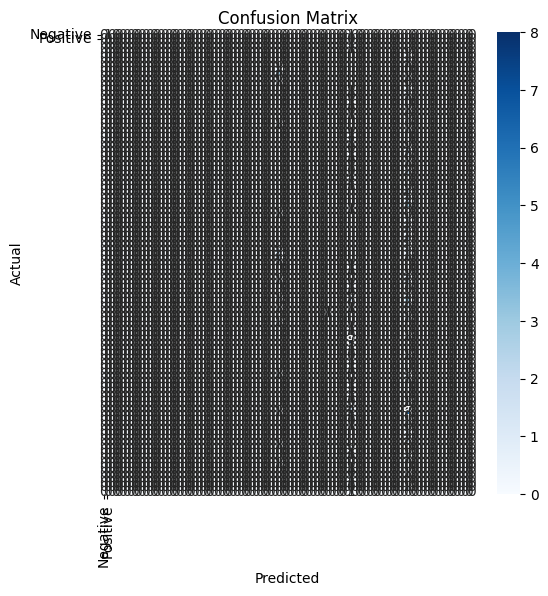

In [352]:
# Visualize the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [355]:
df1.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [356]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

In [364]:
# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Error loading punkt: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>
[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>
[nltk_data] Error loading wordnet: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>
[nltk_data] Error loading omw-1.4: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>


False

In [365]:
# Download required NLTK data
resources = ['punkt', 'stopwords', 'wordnet', 'averaged_perceptron_tagger']
for resource in resources:
    try:
        nltk.download(resource, quiet=True)
    except Exception as e:
        print(f"Error downloading {resource}: {str(e)}")
        
# Import NLTK modules after downloading
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Error loading punkt: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>
[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>
[nltk_data] Error loading wordnet: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>
[nltk_data] Error loading averaged_perceptron_tagger: <urlopen error
[nltk_data]     [Errno -3] Temporary failure in name resolution>


In [369]:
class SentimentAnalyzer:
    def __init__(self):
        self.vectorizer = TfidfVectorizer(max_features=5000)
        self.classifier = LogisticRegression(random_state=42, max_iter=1000)
        self.lemmatizer = WordNetLemmatizer()
        self.stop_words = set(stopwords.words('english'))

    # def preprocess_text(self, text):
    #     # Convert to lowercase
    #     text = text.lower()
        
    #     # Remove special characters and numbers
    #     text = re.sub(r'[^a-zA-Z\s]', '', text)
        
    #     # Tokenization
    #     tokens = word_tokenize(text)
        
    #     # Remove stopwords and lemmatize
    #     tokens = [self.lemmatizer.lemmatize(token) for token in tokens 
    #              if token not in self.stop_words and len(token) > 2]
        
    #     return ' '.join(tokens)
    def preprocess_text(self,text):
        if not isinstance(text, str):  # Check if the input is a string
            return ""  # Return an empty string or handle it as needed
    
        # Tokenization
        tokens = nltk.word_tokenize(text)
        
        # Remove stop words
        stop_words = set(stopwords.words('english'))
        tokens = [word for word in tokens if word.lower() not in stop_words]
        
        # Join tokens back to a single string
        cleaned_text = ' '.join(tokens)
        return cleaned_text

    def prepare_data(self, data):
        """Prepare the data for training or prediction"""
        if isinstance(data, pd.Series):
            processed_texts = data.apply(self.preprocess_text)
        else:
            processed_texts = [self.preprocess_text(text) for text in data]
        return processed_texts

    def train(self, X_train, y_train):
        """Train the sentiment analyzer"""
        # Preprocess the training data
        processed_X_train = self.prepare_data(X_train)
        
        # Vectorize the text
        X_train_vectorized = self.vectorizer.fit_transform(processed_X_train)
        
        # Train the classifier
        self.classifier.fit(X_train_vectorized, y_train)

    def predict(self, X):
        """Predict sentiment for new texts"""
        processed_X = self.prepare_data(X)
        X_vectorized = self.vectorizer.transform(processed_X)
        return self.classifier.predict(X_vectorized)

    def evaluate(self, X_test, y_test):
        """Evaluate the model and print metrics"""
        # Make predictions
        y_pred = self.predict(X_test)
        
        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='weighted')  # Using weighted average for multiclass
        
        # Generate confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        
        # Print metrics
        print(f'Accuracy: {accuracy:.2f}')
        print(f'F1-score (weighted): {f1:.2f}')
        print('\nClassification Report:')
        print(classification_report(y_test, y_pred))
        
        # Plot confusion matrix
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title('Confusion Matrix')
        plt.show()
        
        return accuracy, f1, cm


In [360]:
df1.columns

Index(['Sentence', 'Sentiment'], dtype='object')

In [367]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    df1['Sentence'], 
    df1['Sentiment'],
    test_size=0.2,
    random_state=42
)

In [370]:
 # Initialize and train the sentiment analyzer
sentiment_analyzer = SentimentAnalyzer()
sentiment_analyzer.train(X_train, y_train)

In [372]:
# Example of making predictions on new texts
sample_texts = [
    "This product exceeded my expectations! Great quality and fast shipping.",
    "Terrible experience, the product arrived damaged and customer service was unhelpful.",
    "It's okay, nothing special but gets the job done."
]
predictions = sentiment_analyzer.predict(sample_texts)

# Print predictions
for text, pred in zip(sample_texts, predictions):
    print(f"\nText: {text}\nPredicted Sentiment: {pred}\n")


Text: This product exceeded my expectations! Great quality and fast shipping.
Predicted Sentiment: neutral


Text: Terrible experience, the product arrived damaged and customer service was unhelpful.
Predicted Sentiment: neutral


Text: It's okay, nothing special but gets the job done.
Predicted Sentiment: neutral



Accuracy: 0.69
F1-score (weighted): 0.66

Classification Report:
              precision    recall  f1-score   support

    negative       0.44      0.15      0.23       175
     neutral       0.69      0.89      0.78       622
    positive       0.75      0.61      0.67       372

    accuracy                           0.69      1169
   macro avg       0.63      0.55      0.56      1169
weighted avg       0.67      0.69      0.66      1169



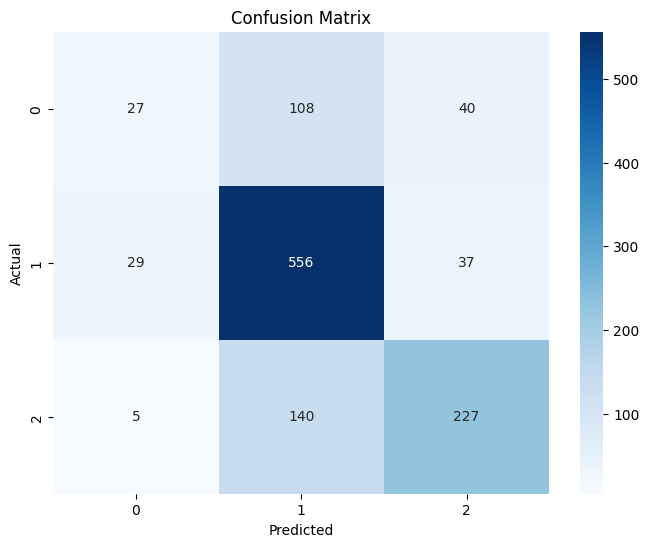

In [371]:
# Evaluate the model
accuracy, f1, cm = sentiment_analyzer.evaluate(X_test, y_test)

In [383]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import os
import sys

def download_nltk_data():
    """Download required NLTK data with error handling"""
    try:
        # Create nltk_data directory if it doesn't exist
        nltk_data_dir = os.path.expanduser('~/nltk_data')
        if not os.path.exists(nltk_data_dir):
            os.makedirs(nltk_data_dir)
        
        # Download required NLTK data
        resources = ['punkt', 'stopwords', 'wordnet', 'averaged_perceptron_tagger']
        for resource in resources:
            try:
                nltk.download(resource, quiet=True)
            except Exception as e:
                print(f"Error downloading {resource}: {str(e)}")
                
        # Import NLTK modules after downloading
        from nltk.tokenize import word_tokenize
        from nltk.corpus import stopwords
        from nltk.stem import WordNetLemmatizer
        return True
        
    except Exception as e:
        print(f"Error setting up NLTK: {str(e)}")
        return False

# Download NLTK data
if not download_nltk_data():
    print("Failed to download NLTK data. Using simplified preprocessing.")
    USE_NLTK = False
else:
    USE_NLTK = True
    from nltk.tokenize import word_tokenize
    from nltk.corpus import stopwords
    from nltk.stem import WordNetLemmatizer

class SentimentAnalyzer:
    def __init__(self):
        self.vectorizer = TfidfVectorizer(
            max_features=5000,
            ngram_range=(1, 2),
            min_df=2,
            max_df=0.95
        )
        self.classifier = LogisticRegression(
            random_state=42,
            max_iter=1000,
            class_weight='balanced'
        )
        if USE_NLTK:
            self.lemmatizer = WordNetLemmatizer()
            self.stop_words = set(stopwords.words('english'))
        
    def basic_preprocess(self, text):
        """Basic preprocessing without NLTK"""
        # Convert to lowercase
        text = text.lower()
        # Remove special characters and numbers
        text = ''.join([c for c in text if c.isalnum() or c.isspace()])
        # Remove extra whitespace
        text = ' '.join(text.split())
        return text
    
    def nltk_preprocess(self, text):
        """Advanced preprocessing with NLTK"""
        # Convert to lowercase
        text = text.lower()
        # Remove special characters and numbers
        text = ''.join([c for c in text if c.isalnum() or c.isspace()])
        # Tokenization
        tokens = word_tokenize(text)
        # Remove stopwords and lemmatize
        tokens = [self.lemmatizer.lemmatize(token) for token in tokens 
                 if token not in self.stop_words and len(token) > 2]
        return ' '.join(tokens)

    # def preprocess_text(self, text):
    #     """Choose preprocessing method based on NLTK availability"""
    #     if USE_NLTK:
    #         return self.nltk_preprocess(text)
    #     return self.basic_preprocess(text)
    def preprocess_text(self,text):
        if not isinstance(text, str):  # Check if the input is a string
            return ""  # Return an empty string or handle it as needed
    
        # Tokenization
        tokens = nltk.word_tokenize(text)
        
        # Remove stop words
        stop_words = set(stopwords.words('english'))
        tokens = [word for word in tokens if word.lower() not in stop_words]
        
        # Join tokens back to a single string
        cleaned_text = ' '.join(tokens)
        return cleaned_text

    def prepare_data(self, texts):
        """Prepare the data for training or prediction"""
        if isinstance(texts, pd.Series):
            return texts.apply(self.preprocess_text)
        return [self.preprocess_text(text) for text in texts]

    def train(self, X_train, y_train):
        """Train the sentiment analyzer"""
        try:
            # Preprocess the training data
            processed_X_train = self.prepare_data(X_train)
            
            # Vectorize the text
            X_train_vectorized = self.vectorizer.fit_transform(processed_X_train)
            
            # Train the classifier
            self.classifier.fit(X_train_vectorized, y_train)
            return True
        except Exception as e:
            print(f"Error during training: {str(e)}")
            return False

    def predict(self, X):
        """Predict sentiment for new texts"""
        try:
            processed_X = self.prepare_data(X)
            X_vectorized = self.vectorizer.transform(processed_X)
            return self.classifier.predict(X_vectorized)
        except Exception as e:
            print(f"Error during prediction: {str(e)}")
            return None

    def evaluate(self, X_test, y_test):
        """Evaluate the model and print metrics"""
        try:
            # Make predictions
            y_pred = self.predict(X_test)
            if y_pred is None:
                return None
            
            # Calculate metrics
            accuracy = accuracy_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred, average='weighted')
            cm = confusion_matrix(y_test, y_pred)
            
            # Print metrics
            print(f'Accuracy: {accuracy:.2f}')
            print(f'F1-score (weighted): {f1:.2f}')
            print('\nClassification Report:')
            print(classification_report(y_test, y_pred))
            
            # Plot confusion matrix
            plt.figure(figsize=(8, 6))
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
            plt.xlabel('Predicted')
            plt.ylabel('Actual')
            plt.title('Confusion Matrix')
            plt.show()
            
            return accuracy, f1, cm
            
        except Exception as e:
            print(f"Error during evaluation: {str(e)}")
            return None

[nltk_data] Error loading punkt: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>
[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>
[nltk_data] Error loading wordnet: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>
[nltk_data] Error loading averaged_perceptron_tagger: <urlopen error
[nltk_data]     [Errno -3] Temporary failure in name resolution>


In [384]:
df1.columns

Index(['Sentence', 'Sentiment'], dtype='object')

In [385]:
#def main():
# try:
# Load your dataset
# Replace 'reviews.csv' with your actual data file
data = pd.read_csv('/kaggle/input/financial-sentiment-analysis/data.csv')
    
# Ensure required columns exist
required_columns = ['Sentence', 'Sentiment']
if not all(col in data.columns for col in required_columns):
    raise ValueError("Dataset must contain 'text' and 'sentiment' columns")


In [387]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    data['Sentence'], 
    data['Sentiment'],
    test_size=0.2,
    random_state=42,
    stratify=data['Sentiment']  # Ensure balanced split
)

In [388]:
# Initialize and train the model
print("Initializing sentiment analyzer...")
analyzer = SentimentAnalyzer()
    

Initializing sentiment analyzer...


Training model...
Training completed successfully!

Evaluating model performance...
Accuracy: 0.66
F1-score (weighted): 0.67

Classification Report:
              precision    recall  f1-score   support

    negative       0.34      0.47      0.40       172
     neutral       0.77      0.70      0.73       626
    positive       0.69      0.68      0.69       371

    accuracy                           0.66      1169
   macro avg       0.60      0.62      0.60      1169
weighted avg       0.68      0.66      0.67      1169



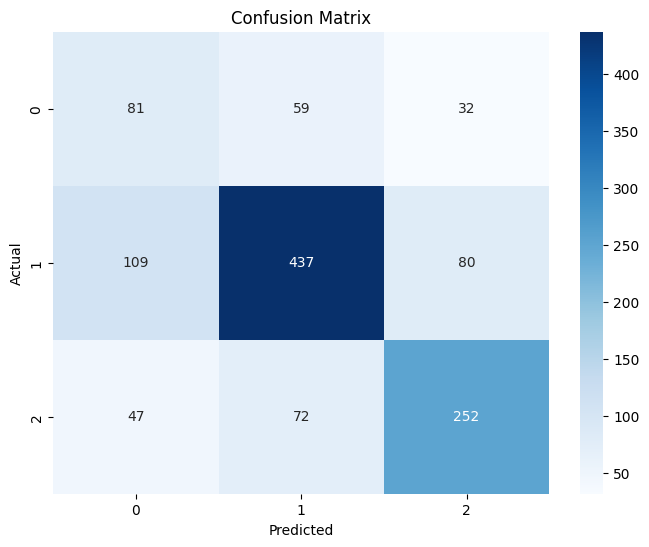


Testing with sample reviews:

Text: This product exceeded my expectations! Great quality and fast shipping.
Predicted Sentiment: positive

Text: Terrible experience, the product arrived damaged and customer service was unhelpful.
Predicted Sentiment: neutral

Text: It's okay, nothing special but gets the job done.
Predicted Sentiment: neutral


In [389]:
print("Training model...")
if analyzer.train(X_train, y_train):
    print("Training completed successfully!")

    # Evaluate the model
    print("\nEvaluating model performance...")
    results = analyzer.evaluate(X_test, y_test)

    if results:
        # Test with sample texts
        sample_texts = [
            "This product exceeded my expectations! Great quality and fast shipping.",
            "Terrible experience, the product arrived damaged and customer service was unhelpful.",
            "It's okay, nothing special but gets the job done."
        ]
        
        print("\nTesting with sample reviews:")
        predictions = analyzer.predict(sample_texts)
        if predictions is not None:
            for text, pred in zip(sample_texts, predictions):
                print(f"\nText: {text}\nPredicted Sentiment: {pred}")
        
# except Exception as e:
#     print(f"Error in main execution: {str(e)}")

# if __name__ == "__main__":
#     main()